# Non-linear dynamics - Numerical project

In [57]:
#!jt -t chesterish -cellw 90% -lineh 170
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp #solves ODE with initiel values with adaptive stepsize RK4-5
import sympy as smp

## Part 1: Task 1

### 1a)

In [58]:
r, r1, r2, T = smp.symbols("r r1 r2 T")
eq = 1/(r*(1-r**2))
Ieq = smp.integrate(eq, (r, r2,r1))
IeqT = smp.Eq(Ieq, T)
print(smp.latex(IeqT))
Pr = smp.solvers.solve(IeqT, r2)
print(smp.latex(Pr))

\log{\left(r_{1} \right)} - \log{\left(r_{2} \right)} - \frac{\log{\left(r_{1}^{2} - 1 \right)}}{2} + \frac{\log{\left(r_{2}^{2} - 1 \right)}}{2} = T
\left[ - r_{1} \sqrt{\frac{1}{- r_{1}^{2} e^{2 T} + r_{1}^{2} + e^{2 T}}}, \  r_{1} \sqrt{\frac{1}{- r_{1}^{2} e^{2 T} + r_{1}^{2} + e^{2 T}}}\right]


Solved for $w$
$$\log{\left(r_{1} \right)} - \log{\left(r_{2} \right)} - \frac{\log{\left(r_{1}^{2} - 1 \right)}}{2} + \frac{\log{\left(r_{2}^{2} - 1 \right)}}{2} = T$$

Solved for $r^{n+1}$
$$\left[ - r_{1} \sqrt{\frac{1}{- r_{1}^{2} e^{2 T} + r_{1}^{2} + e^{2 T}}}, \  r_{1} \sqrt{\frac{1}{- r_{1}^{2} e^{2 T} + r_{1}^{2} + e^{2 T}}}\right]$$




In [59]:
def P1(r, T = 2*np.pi/(4*np.pi)):
    return (1 + np.exp(-2*T)*(r**(-2) - 1))**(-1/2)

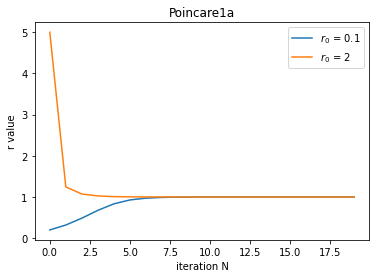

In [60]:
iter_N = 20
iter_list_1 = np.zeros((iter_N))
iter_list_1[0] = 0.2
iter_list_2 = np.zeros((iter_N))
iter_list_2[0] = 5
for i in range(iter_N - 1):
    iter_list_1[i+1] = P1(iter_list_1[i])
    iter_list_2[i+1] = P1(iter_list_2[i])
    
plt.plot(iter_list_1, label = "$r_0$ = 0.1")
plt.plot(iter_list_2, label = "$r_0$ = 2")
plt.legend()
plt.xlabel("iteration N")
plt.ylabel("r value")
plt.title("Poincare1a")
# plt.savefig("Poincare1a")

### 1c)

In [61]:
def P2(r, A = 1, w = 1, T = 1):
    return (r - np.pi)* np.exp(T*(A + w)) + np.pi

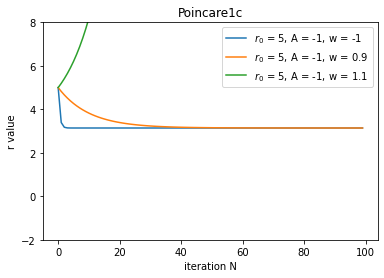

In [93]:
iter_N = 100
iter_list_1 = np.zeros((iter_N))
iter_list_1[0] = 5
iter_list_2 = np.zeros((iter_N))
iter_list_2[0] = 5
iter_list_3 = np.zeros((iter_N))
iter_list_3[0] = 5
for i in range(iter_N - 1):
    iter_list_1[i+1] = P2(iter_list_1[i], A = -1, w = -1)
    iter_list_2[i+1] = P2(iter_list_2[i], A = -1, w = 0.9)
    iter_list_3[i+1] = P2(iter_list_3[i], A = -1, w = 1.1)
    
plt.plot(iter_list_1, label = "$r_0$ = 5, A = -1, w = -1")
plt.plot(iter_list_2, label = "$r_0$ = 5, A = -1, w = 0.9")
plt.plot(iter_list_3, label = "$r_0$ = 5, A = -1, w = 1.1")
plt.ylim(-2,8)
plt.legend()
plt.xlabel("iteration N")
plt.ylabel("r value")
plt.title("Poincare1c")
# plt.savefig("Poincare1c")

## Part 2: Task 2 & 3

#### Some general plots in 3D

In [63]:
def LorentzEquation(t, x, sigma = 10, rho = 28, beta = 8/3):
    f = np.zeros((np.shape(x)))
    f[0] = sigma*(x[1] - x[0])
    f[1] = x[0]*(rho - x[2]) - x[1]
    f[2] = x[0]*x[1] - beta*x[2]
    return f

def RosslerSystem(t, x, a = 0.2, b = 0.2, c = 5.7):
    f = np.zeros((np.shape(x)))
    f[0] = -x[1] - x[2]
    f[1] = x[0] + a*x[1]
    f[2] = b + x[2]*(x[0] -c)
    return f

In [64]:
x0 = np.full(3, 0.001)
T_intervall_1 = np.array([0, 50])
T_intervall_2 = np.array([0, 500])
T_intervall_3 = np.array([0, 1E+5])

In [65]:
x_sol_object_lorentz = solve_ivp(LorentzEquation, T_intervall_1, x0, rtol = 1E-9) #returns a "bunch" object, which is basicly one you can get things like the solution and timestpes array out of with .y and .t respectably
t_sol_lorentz, x_sol_lorentz = x_sol_object_lorentz.t, x_sol_object_lorentz.y
x_sol_object_rossler = solve_ivp(RosslerSystem, T_intervall_2, x0, rtol = 1E-9)
t_sol_rossler, x_sol_rossler = x_sol_object_rossler.t, x_sol_object_rossler.y

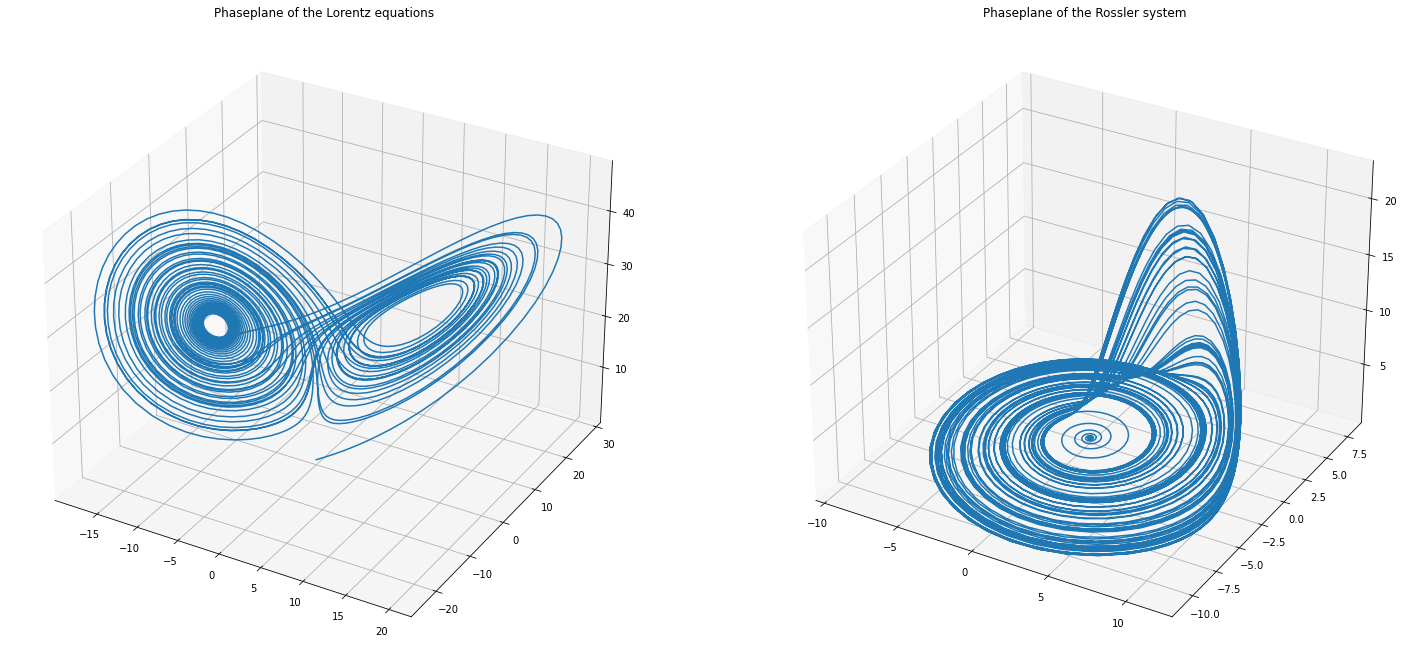

<Figure size 432x288 with 0 Axes>

In [66]:
fig = plt.figure(figsize = (25,25))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.set_title("Phaseplane of the Lorentz equations")
ax2.set_title("Phaseplane of the Rossler system")
ax1.plot(x_sol_lorentz[0],x_sol_lorentz[1], x_sol_lorentz[2])
ax2.plot(x_sol_rossler[0],x_sol_rossler[1], x_sol_rossler[2])
plt.show()
# plt.savefig("3Dlorentzrossberg")

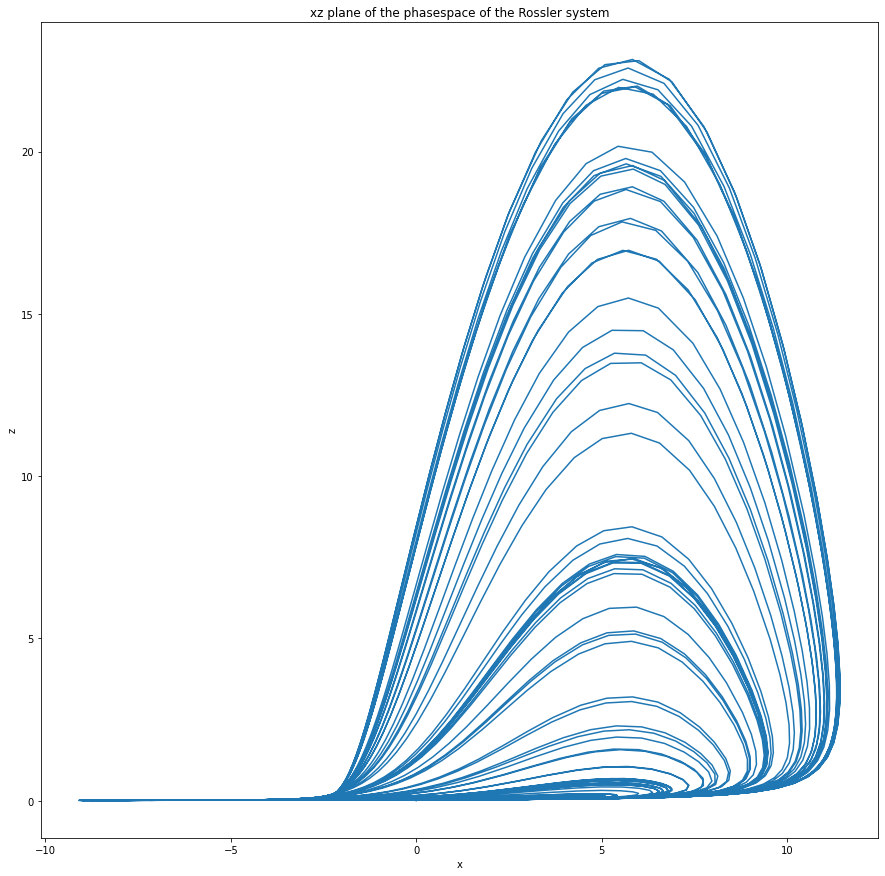

In [67]:
plt.figure(figsize = (15,15))
plt.plot(x_sol_rossler[0],x_sol_rossler[2])
plt.title("xz plane of the phasespace of the Rossler system")
plt.xlabel("x")
plt.ylabel("z")
# plt.savefig("xz_rossberg")

## Task 2

#### 2a)

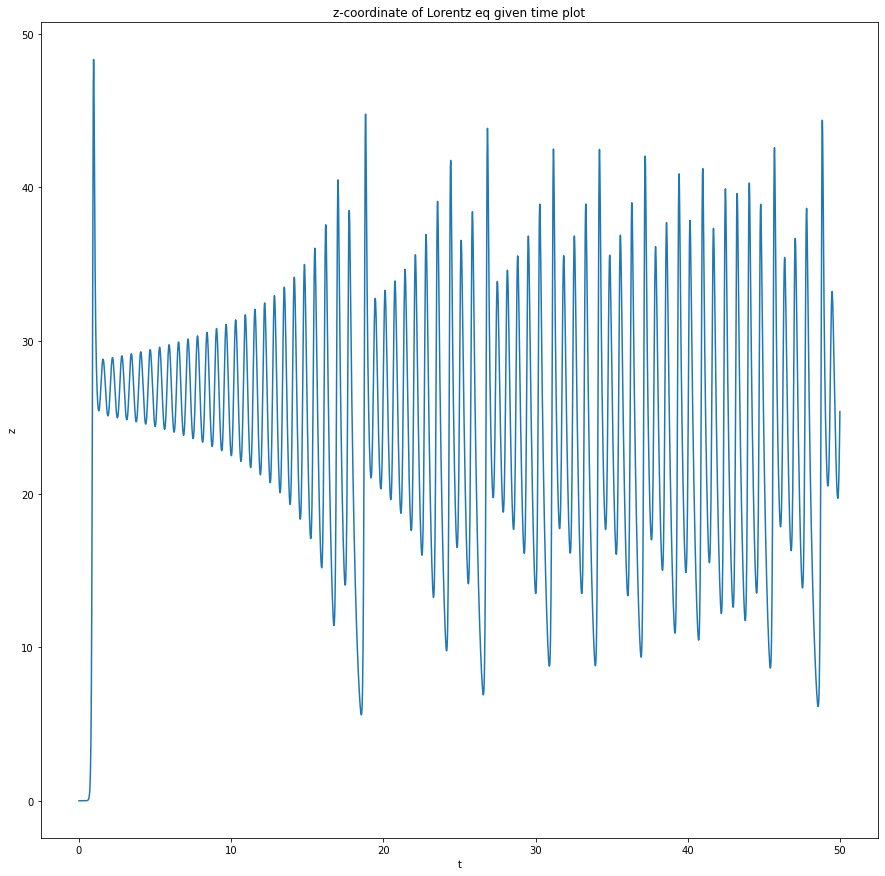

In [68]:
x_sol_object_lorentz = solve_ivp(LorentzEquation, T_intervall_1, x0, rtol = 1E-9) #returns a "bunch" object, which is basicly one you can get things like the solution and timestpes array out of with .y and .t respectably
t_sol_lorentz, x_sol_lorentz = x_sol_object_lorentz.t, x_sol_object_lorentz.y
fig, ax = plt.subplots(figsize = (15,15))
ax.set_title("z-coordinate of Lorentz eq given time plot")
ax.plot(t_sol_lorentz, x_sol_lorentz[2])
plt.xlabel("t")
plt.ylabel("z")
# plt.savefig("tz_lorentz")

#### 2b)

In [112]:
x_sol_object_lorentz = solve_ivp(LorentzEquation, T_intervall_3, x0, atol = 1E-3) #relaxes the relative tol a little bit as timeintervall3 goes from 0 to 10^5
t_sol_lorentz, x_sol_lorentz = x_sol_object_lorentz.t, x_sol_object_lorentz.y

Text(0.5, 1.0, '$z_{n+1}$ given $z_{n}$ in Lorentz system')

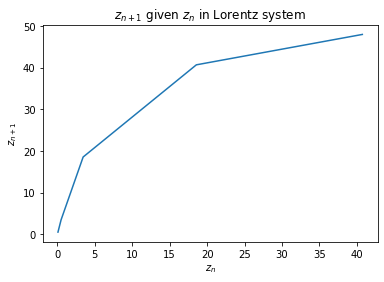

In [113]:
z_max = 0
z_max_list = []
for z in x_sol_lorentz[2]:
    if z > z_max:
        z_max_list.append(z)
        z_max = z
z_max_list = np.array(z_max_list)
plt.xlabel("$z_n$")
plt.ylabel("$z_{n+1}$")

plt.plot(z_max_list[:-1], z_max_list[1:])
plt.title("$z_{n+1}$ given $z_{n}$ in Lorentz system")
# plt.savefig("lorentz_zn_max")

#### 2b i)

In [94]:
def get_random_IC_integrated(sys = LorentzEquation):
    randomvec = np.random.uniform(0,1,3)
    x0_1 = randomvec/np.linalg.norm(randomvec) * 1E-6 
    x_sol_object_sys = solve_ivp(sys, T_intervall_1, x0_1, rtol = 1E-9)
    x0 = x_sol_object_sys.y[:,-1]
    return x0
x0 = get_random_IC_integrated()

#### 2b ii)

In [95]:
def get_random_close(x):
    randomvec = np.random.uniform(0,1,3)
    return x - randomvec/np.linalg.norm(randomvec) * 1E-6
x1 = get_random_close(x0)

#### 2b iii)

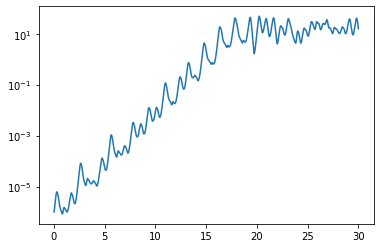

In [96]:
Tend = 30
t_eval = np.linspace(0, Tend, 10000)
def get_integration_dist(x0, x1, t_eval, Tend, sys = LorentzEquation):
    x_sol_object_sys_0 = solve_ivp(sys, [0,Tend], x0, rtol = 1E-9, t_eval = t_eval)
    x_sol_object_sys_1 = solve_ivp(sys, [0,Tend], x1, rtol = 1E-9, t_eval = t_eval)
    x0_sol = x_sol_object_sys_0.y
    x1_sol = x_sol_object_sys_0.y
    x_dist = np.linalg.norm(x_sol_object_sys_0.y - x_sol_object_sys_1.y, axis = 0)
    return x_dist

x_dist = get_integration_dist(x0,x1,t_eval, Tend)
plt.yscale("log")
plt.plot(t_eval, x_dist)

#### 2b iv)

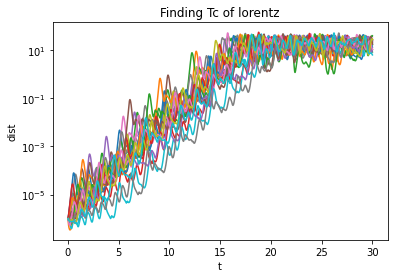

In [97]:
for i in range(20):
    x0 = get_random_IC_integrated()
    x1 = get_random_close(x0)
    x_dist = get_integration_dist(x0,x1,t_eval, Tend)
    plt.yscale("log")
    plt.plot(t_eval, x_dist)
plt.xlabel("t")
plt.ylabel("dist")
plt.title("Finding Tc of lorentz")
plt.savefig("Tc_lorentz")

#### 2b v & vi)

In [98]:
Tc = 18 #found on eyesight
N = 20
M = 10000
t_eval = np.linspace(0, Tc, M)
x_distances = np.zeros((N,M))
for i in range(N):
    x0 = get_random_IC_integrated()
    x1 = get_random_close(x0)
    x_dist = get_integration_dist(x0,x1,t_eval, Tc)
    x_distances[i,:] = x_dist


#### 2c)

(20, 10000)
304.8648440842928
Liaponiov is 0.9188692682464672


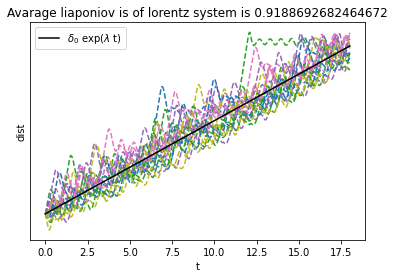

In [99]:
print(np.shape(x_distances))
x_distances_summed = np.sum(x_distances, axis = 0)

liaponiv = (np.log(x_distances_summed[-1]) - np.log(x_distances_summed[0])) / Tc
liaponiv10 = np.log10(x_distances_summed[-1]) - np.log10(x_distances_summed[0])
print(x_distances_summed[-1])
print(f"Liaponiov is {liaponiv}")
plt.yscale("log")
for i in range(N):
    plt.plot(t_eval, x_distances[i], "--", "r")
plt.plot(t_eval, 1E-6 * np.exp(liaponiv*t_eval),"k", label = "$\delta_0$ exp($\lambda$ t)")
plt.legend()
plt.xlabel("t")
plt.ylabel("dist")
plt.title(f"Avarage liaponiov is of lorentz system is {liaponiv}")
# plt.savefig("Liapunov_lorentz")

## Task 3


#### 3a)

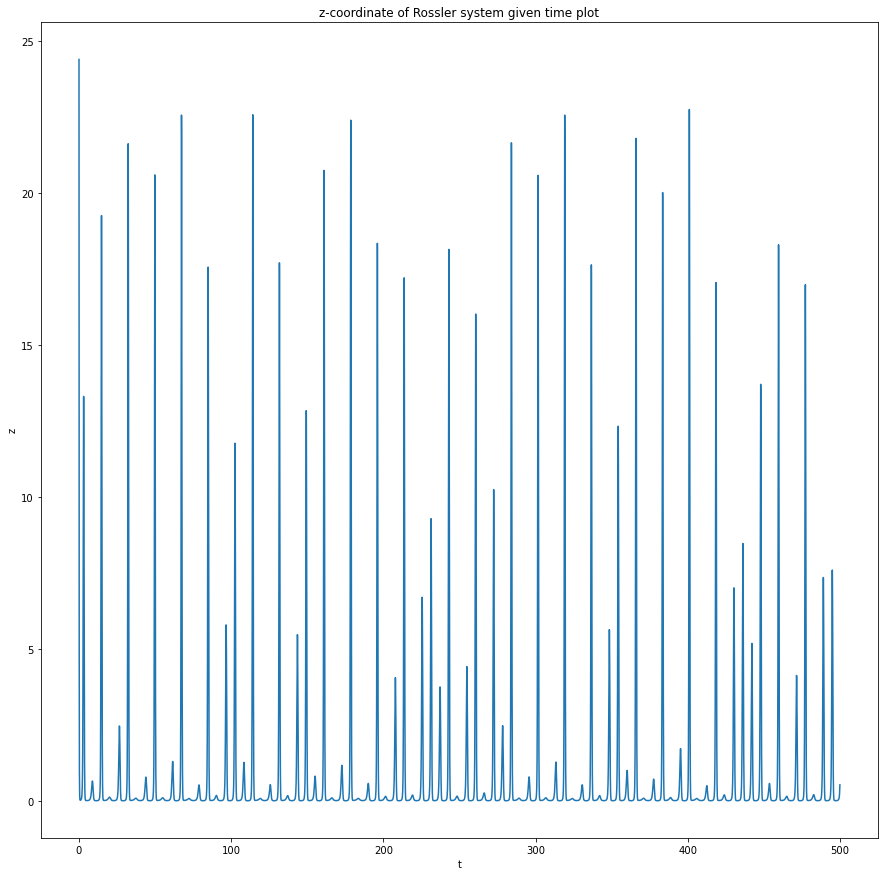

In [77]:
x_sol_object_rossler = solve_ivp(RosslerSystem, T_intervall_2, x0, rtol = 1E-9) #returns a "bunch" object, which is basicly one you can get things like the solution and timestpes array out of with .y and .t respectably
t_sol_rossler, x_sol_rossler = x_sol_object_rossler.t, x_sol_object_rossler.y
fig, ax = plt.subplots(figsize = (15,15))
ax.set_title("z-coordinate of Rossler system given time plot")
ax.plot(t_sol_rossler, x_sol_rossler[2])
plt.xlabel("t")
plt.ylabel("z")
# plt.savefig("tz_rossberg")

#### 3b)

Text(0.5, 1.0, '$z_{n+1}$ given $z_{n}$ in rossler system')

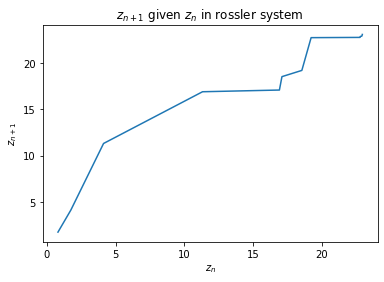

In [114]:
x_sol_object_rossler = solve_ivp(RosslerSystem, T_intervall_3, x0, atol = 1E-3) #relaxes the relative tol a little bit as timeintervall3 goes from 0 to 10^5
t_sol_rossler, x_sol_rossler = x_sol_object_rossler.t, x_sol_object_rossler.y

z_max = 0
z_max_list = []
for count,  z in enumerate(x_sol_rossler[2]):
    if t_sol_rossler[count] < 100: #Does seem like the origin is not in the attractor, so we do not want to include those
        continue
    if z > z_max:
        z_max_list.append(z)
        z_max = z
z_max_list = np.array(z_max_list)
plt.xlabel("$z_n$")
plt.ylabel("$z_{n+1}$")  
plt.plot(z_max_list[:-1], z_max_list[1:])
plt.title("$z_{n+1}$ given $z_{n}$ in rossler system")
# plt.savefig("rossler_zn_max")      

#### 3b i-vi)
(same code)

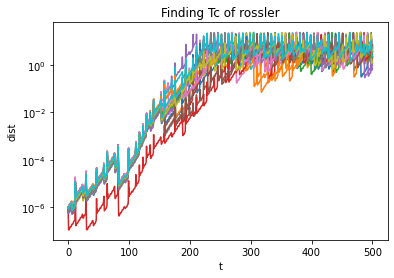

In [100]:
Tend = 500
t_eval = np.linspace(0, Tend, 10000)
for i in range(20):
    x0 = get_random_IC_integrated(sys = RosslerSystem)
    x1 = get_random_close(x0)
    x_dist = get_integration_dist(x0,x1,t_eval, Tend, sys = RosslerSystem)
    plt.yscale("log")
    plt.plot(t_eval, x_dist)
plt.xlabel("t")
plt.ylabel("dist")
plt.title("Finding Tc of rossler")
# plt.savefig("Tc_rossler")

In [109]:
Tc_ros = 250 #found on eyesight
N = 20
M = 10000
t_eval = np.linspace(0, Tc_ros, M)
x_distances = np.zeros((N,M))
for i in range(N):
    x0 = get_random_IC_integrated(sys = RosslerSystem)
    x1 = get_random_close(x0)
    x_dist = get_integration_dist(x0,x1,t_eval, Tend = Tc_ros, sys = RosslerSystem)
    x_distances[i,:] = x_dist

(20, 10000)
54.507264841444254
Liaponiov is 0.05927244910820607


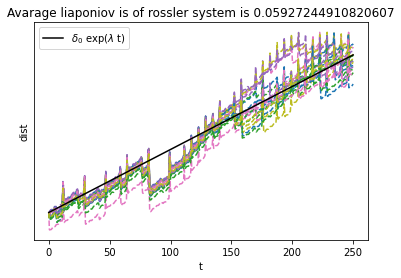

In [110]:
print(np.shape(x_distances))
x_distances_summed = np.sum(x_distances, axis = 0)

liaponiv = (np.log(x_distances_summed[-1]) - np.log(x_distances_summed[0])) / Tc_ros
liaponiv10 = np.log10(x_distances_summed[-1]) - np.log10(x_distances_summed[0])
print(x_distances_summed[-1])
print(f"Liaponiov is {liaponiv}")
plt.yscale("log")
for i in range(N):
    plt.plot(t_eval, x_distances[i], "--", "r")
plt.plot(t_eval, 1E-6 * np.exp(liaponiv*t_eval),"k", label = "$\delta_0$ exp($\lambda$ t)")
plt.legend()
plt.xlabel("t")
plt.ylabel("dist")
plt.title(f"Avarage liaponiov is of rossler system is {liaponiv}")
# plt.savefig("Liapunov_rossler")